<a href="https://colab.research.google.com/github/aradhyTripathi2309/-6thSem-ML-Lab-/blob/main/end_to_end_project_ML_Lab_1BM22CS049.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     

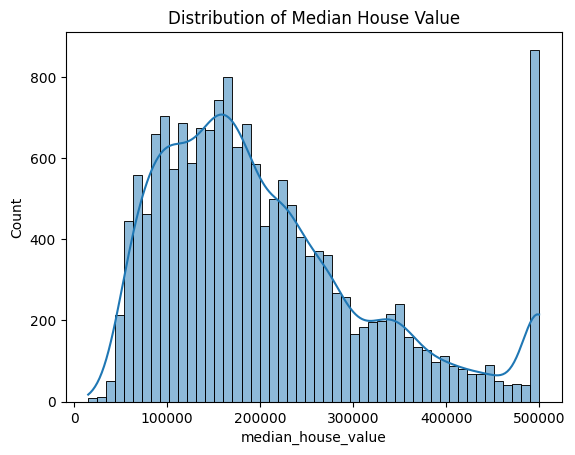

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Mean Absolute Error: 32335.450452941175
Mean Squared Error: 2434964783.6812205
Root Mean Squared Error: 49345.362332049204
R^2 Score: 0.8232824144618685
Project completed successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
train_data = pd.read_csv("sample_data/california_housing_train.csv")
test_data = pd.read_csv("sample_data/california_housing_test.csv")

# Explore the data
print(train_data.info())
print(train_data.describe())

# Visualize the distribution of target variable
sns.histplot(train_data['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()

# Check for missing values
print(train_data.isnull().sum())

# Split features and target
X = train_data.drop(columns=['median_house_value'])
y = train_data['median_house_value']

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_valid_scaled)

# Evaluate the model
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Make predictions on test data
test_scaled = scaler.transform(test_data.drop(columns=['median_house_value']))
test_predictions = rf_model.predict(test_scaled)

# Save predictions
test_data['predicted_median_house_value'] = test_predictions
test_data.to_csv("sample_data/california_housing_predictions.csv", index=False)

print("Project completed successfully!")
